##  EDA : Exploratory Data Analysis and Statistics

#### What is EDA?:
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#### What is ML Pipeline:
A data science pipeline is the overall step by step process towards obtaining, cleaning, visualizing, modeling, and interpreting data within a business or group.

In [25]:
import numpy as np
import pylab
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
iris = sns.load_dataset('iris')

#### Initial Data Checks

In [10]:
## Check the number of data points or observaitons
iris.shape

(150, 5)

In [11]:
## There are 150 etries and no null values present in the dataset. The dataset contains one object feature and 
## 4 numerical features
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [15]:
## Number of columns in the dataset: 5
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
## Null entry check: False
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [21]:
## How many data points are there for each categorical feature
## There 3 flowers/categorical features with 50 data point each
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## 2D- Visualisation


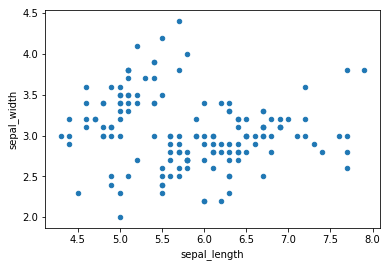

In [42]:
## Creating scatter plot using sepal_length and sepal_width. This is using pandas plotting option
iris.plot('sepal_length','sepal_width',kind='scatter')
plt.show()
## However one can't make much sense out of this plot

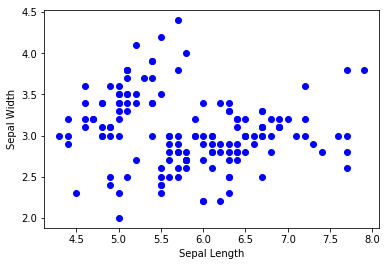

In [45]:
## Plotting single parameter using matplotlib
plt.plot(iris['sepal_length'], iris['sepal_width'], 'bo')  
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.Arrow(110,110,25,25)

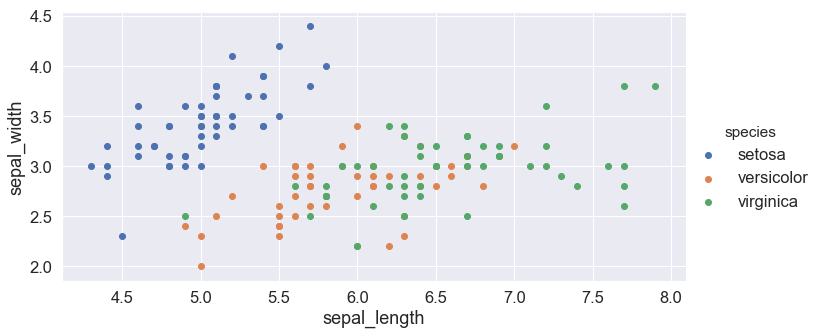

In [88]:
## Scatter plot using seaborn, which is useful in plotting color plot
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
g = sns.FacetGrid(iris,hue='species', height=5, aspect=2)
g.map(plt.scatter, 'sepal_length', 'sepal_width') 
g.add_legend()
plt.show()

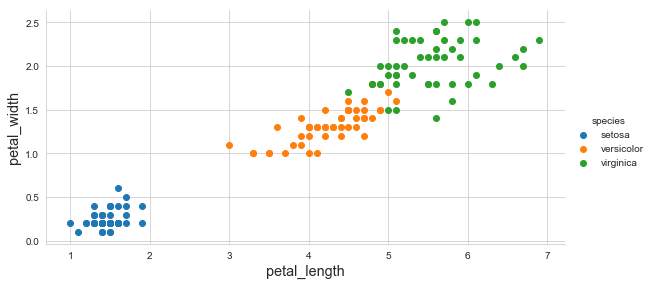

In [84]:
## Scatter plot using seaborn, which is useful in plotting color plot
sns.set_style('whitegrid')
g = sns.FacetGrid(iris,hue='species', height=4, aspect=2)
g.map(plt.scatter, 'petal_length', 'petal_width') 
g.add_legend()
#g.set_xlabel(fontsize=20)

for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')

    # Make title more human-readable and larger
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='xx-large')

    # Make right ylabel more human-readable and larger
    # Only the 2nd and 4th axes have something in ax.texts
    if ax.texts:
        # This contains the right ylabel text
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                txt.get_text().split('=')[1],
                transform=ax.transAxes,
                va='center',
                fontsize='xx-large')
        # Remove the original text
        ax.texts[0].remove()
    
plt.show()

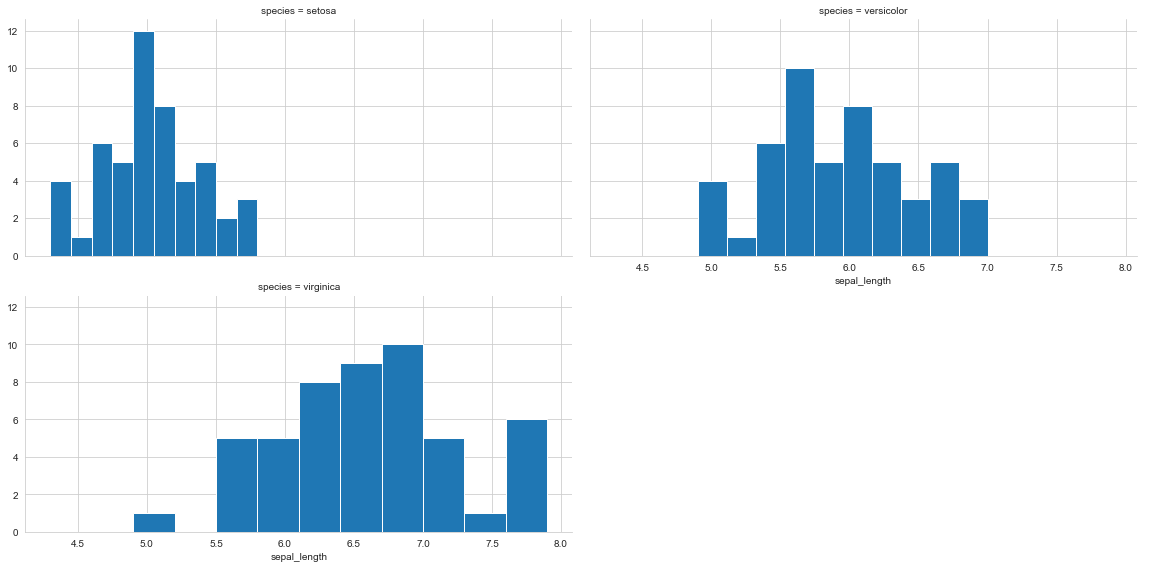

In [80]:
sns.set_style('whitegrid')
g = sns.FacetGrid(iris,col='species',col_wrap=2, height=4, aspect=2)
g.map(plt.hist, 'sepal_length') 
g.add_legend()
plt.show()

#### Observations:

1. sepal_length vs. sepal_width plot and petal_length vs. petal width plot show that setosa flowers can be distiguished from versicolor and virginica flowers.
2. There is some overlapping region between versicolor and virginica and this makes harder to distiguish them.

## Pair Plot

Pair plot is pairwise 2D-scatter plot. The diagonal plot give the histogram of the variable.

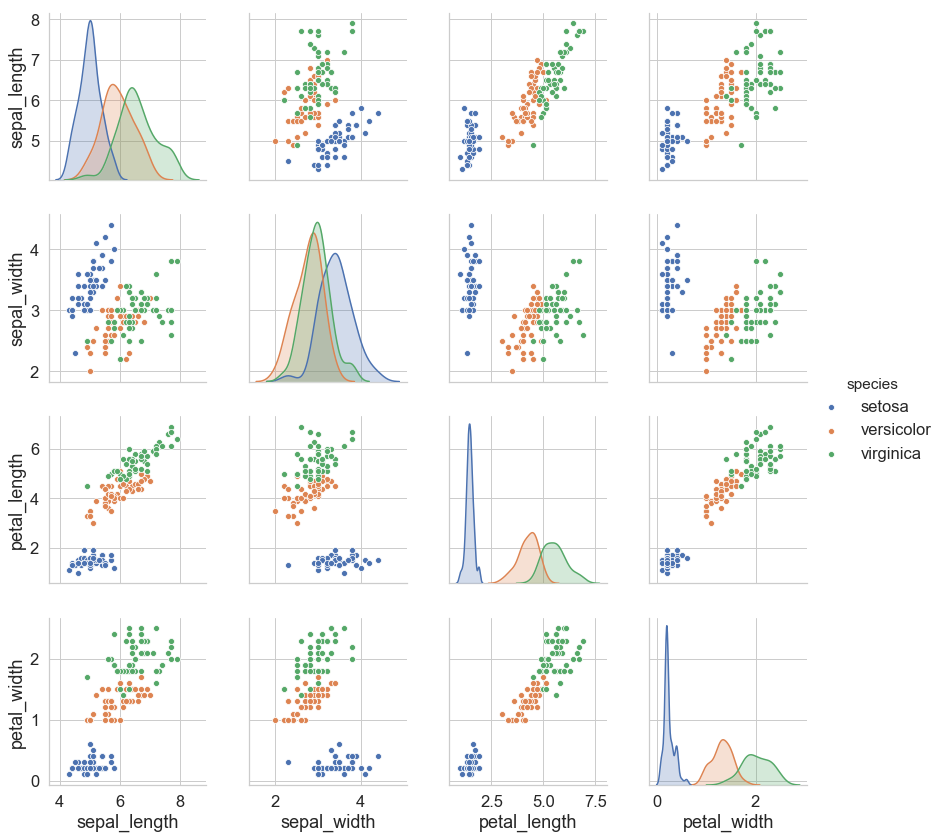

In [164]:
#plt.close()
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.pairplot(iris, hue='species', diag_kind='auto',height=3)

#### Observations:

1. petal_length and petal_width are very important features to classify the three different flowers. Setosa flowers can be distiguished from versicolor and virginica flowers.
2. There is some overlapping region between versicolor and virginica and this makes harder to distiguish them. However, using petal_length and petal_width versicolor and virgica flowers can be distinguished.

## Histogram, PDF and CDF

### Univariate Analysis

In [123]:
## Seperate the dataframe into three different group based on flower
iris_setosa = iris[iris['species'] == 'setosa']
iris_verginica = iris[iris['species'] == 'virginica']
iris_versicolor = iris[iris['species'] == 'versicolor']

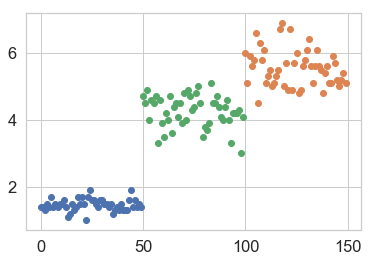

In [165]:
plt.plot(iris_setosa["petal_length"], 'o')
plt.plot(iris_verginica["petal_length"], 'o')
plt.plot(iris_versicolor["petal_length"], 'o')

plt.show()
## Univariate Scatter Plot based on petal_length clearly 

## distiguishes all three flowers

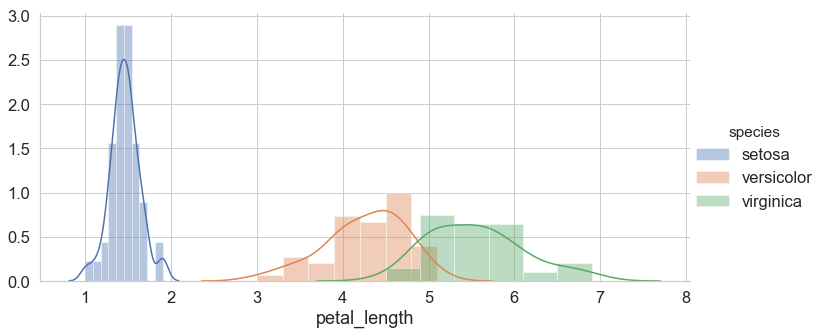

In [167]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
g = sns.FacetGrid(iris, hue='species', height=5, aspect=2)
g.map(sns.distplot, 'petal_length')
g.add_legend()

In [132]:
iris_setosa.std()

sepal_length    0.352490
sepal_width     0.379064
petal_length    0.173664
petal_width     0.105386
dtype: float64

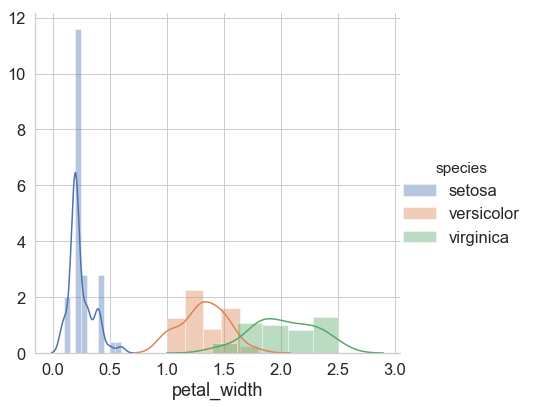

In [168]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
g = sns.FacetGrid(iris, hue='species', height=6, aspect=1)
g.map(sns.distplot, 'petal_width')
g.add_legend()

In [ ]:
# What is probability density function (PDF)?
# PDF is probability distribution of a random variable of a randon experiment.
# It is called density function because the area under this curve gives the 
# probability of a variable.
# Histogram can be used derive the PDF

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


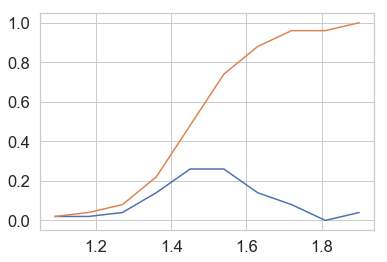

In [169]:
# Cumulative Distribution Function (CDF)
# np.hostogram returns histogram density/area of each bin if density = True 
# and counts in each bin if density = False
# 
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


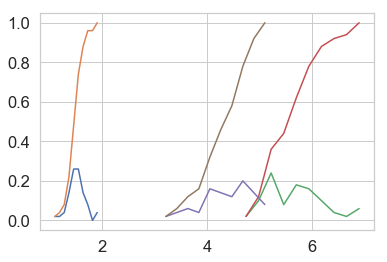

In [170]:
# CDF will help to determine the percentage of variable present within 
# the given value

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris_verginica['petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

## Mean, Variance and Std-deviation

In [190]:
# "%.2f" % is used to print only two decimal points
print("Mean: \n")
print("%.2f" % iris_setosa['petal_length'].mean()) 
# Mean with an outlier 50
print("%.2f" % np.mean(np.append(iris_setosa['petal_length'],50)))
print(iris_verginica['petal_length'].mean())
print(iris_versicolor['petal_length'].mean())


print("\nStd-dev: \n")
print("%.3f" % iris_setosa['petal_length'].std()) 
print("%.3f" % iris_verginica['petal_length'].std())
print("%.3f" % iris_versicolor['petal_length'].std())

Mean: 

1.46
2.41
5.552
4.26

Std-dev: 

0.174
0.552
0.470


## Median, Percentile, Quantile, IQR and MAD

In [207]:
# "%.2f" % is used to print only two decimal points
print("Median: \n")
print("%.2f" % iris_setosa['petal_length'].median()) 
# Median with an outlier 50
print("%.2f" % np.median(np.append(iris_setosa['petal_length'],50)))
print(iris_verginica['petal_length'].median())
print(iris_versicolor['petal_length'].median())


print("\nQuantiles: \n")
print(list(iris_setosa['petal_length'].quantile([0.25,0.5,0.75, 1])))
#print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(list(iris_verginica['petal_length'].quantile([0.25,0.5,0.75, 1])))
print(list(iris_versicolor['petal_length'].quantile([0.25,0.5,0.75, 1])))

print("\n90th Percentiles: \n")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_verginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print("%.3f" % robust.mad(iris_setosa["petal_length"]))
print("%.3f" % robust.mad(iris_verginica["petal_length"]))
print("%.3f" % robust.mad(iris_versicolor["petal_length"]))

Median: 

1.50
1.50
5.55
4.35

Quantiles: 

[1.4, 1.5, 1.5750000000000002, 1.9]
[5.1, 5.55, 5.875000000000001, 6.9]
[4.0, 4.35, 4.6, 5.1]

90th Percentiles: 

1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.148
0.667
0.519


## Box Plot 

Box plot also gives the 5 point statistical summary for the selected feature. 
The central box gives the 25, 50 and 75 percentile values. The outer whiskers are at 1.5 times inter quantile range (Q3-Q1)*1.5, which the difference between third quantile and 1st quantile (Q3-Q1). Any values outside the whiskers are outliers. 

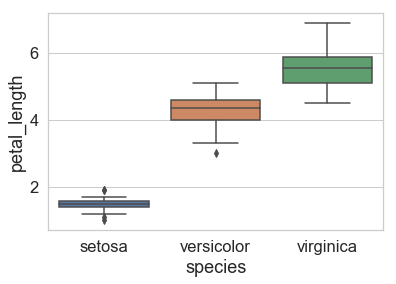

In [209]:
sns.boxplot(x='species', y='petal_length', data=iris)

## Violin Plots

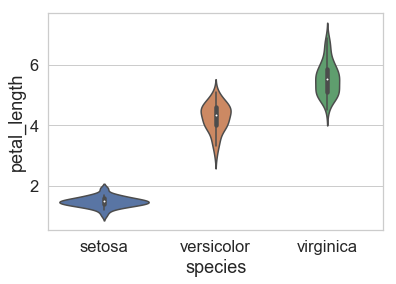

In [212]:
sns.violinplot(x='species', y='petal_length', data=iris, size=8)